In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv ('AAPL.csv')
print (df)


           Date        Open        High         Low       Close   Adj Close  \
0    2021-03-15  121.410004  124.000000  120.419998  123.989998  123.594574   
1    2021-03-16  125.699997  127.220001  124.720001  125.570000  125.169533   
2    2021-03-17  124.050003  125.860001  122.339996  124.760002  124.362122   
3    2021-03-18  122.879997  123.180000  120.320000  120.529999  120.145607   
4    2021-03-19  119.900002  121.430000  119.680000  119.989998  119.607330   
..          ...         ...         ...         ...         ...         ...   
123  2021-09-08  156.979996  157.039993  153.979996  155.110001  155.110001   
124  2021-09-09  155.490005  156.110001  153.949997  154.070007  154.070007   
125  2021-09-10  155.000000  155.479996  148.699997  148.970001  148.970001   
126  2021-09-13  150.630005  151.419998  148.750000  149.550003  149.550003   
127  2021-09-14  150.350006  151.070007  146.910004  148.119995  148.119995   

        Volume  
0     92403800  
1    115227900  


In [6]:
#Store the data into a df
df = pd.read_csv('AAPL.csv')
#Set the date to be the index
df = df.set_index(pd.DatetimeIndex (df[ 'Date'].values))
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2021-03-15,2021-03-15,121.410004,124.000000,120.419998,123.989998,123.594574,92403800
2021-03-16,2021-03-16,125.699997,127.220001,124.720001,125.570000,125.169533,115227900
2021-03-17,2021-03-17,124.050003,125.860001,122.339996,124.760002,124.362122,111932600
2021-03-18,2021-03-18,122.879997,123.180000,120.320000,120.529999,120.145607,121229700
2021-03-19,2021-03-19,119.900002,121.430000,119.680000,119.989998,119.607330,185549500
...,...,...,...,...,...,...,...
2021-09-08,2021-09-08,156.979996,157.039993,153.979996,155.110001,155.110001,74420200
2021-09-09,2021-09-09,155.490005,156.110001,153.949997,154.070007,154.070007,57305700
2021-09-10,2021-09-10,155.000000,155.479996,148.699997,148.970001,148.970001,140646400
2021-09-13,2021-09-13,150.630005,151.419998,148.750000,149.550003,149.550003,102404300


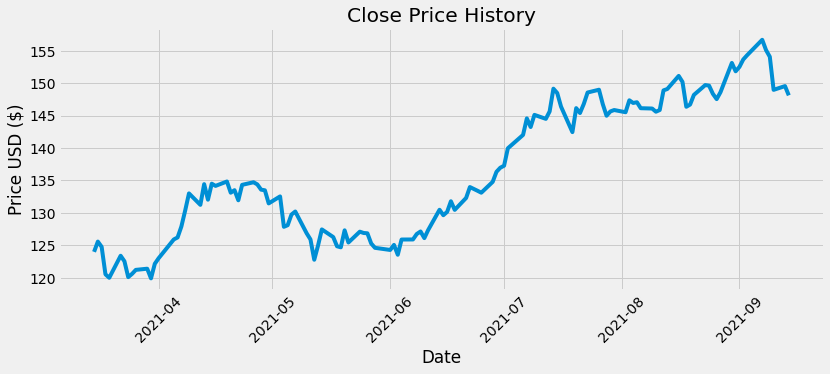

In [10]:
#Visually show the stock price
plt.figure(figsize =(12.2,4.5))
plt.plot(df['Close'], label='Close')
plt.xticks (rotation =45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [15]:
#Calculate the MACF and signal line indicators

#Calculatge the short term exponential moving average (EMA) 
ShortEMA = df.Close.ewm(span=12, adjust=False).mean() 
#Calcualte the long term exponential moving average (EMA)
LongEMA =df.Close.ewm(span=26, adjust=False).mean()
#Calculate teh MACD line
MACD= ShortEMA - LongEMA 
#Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

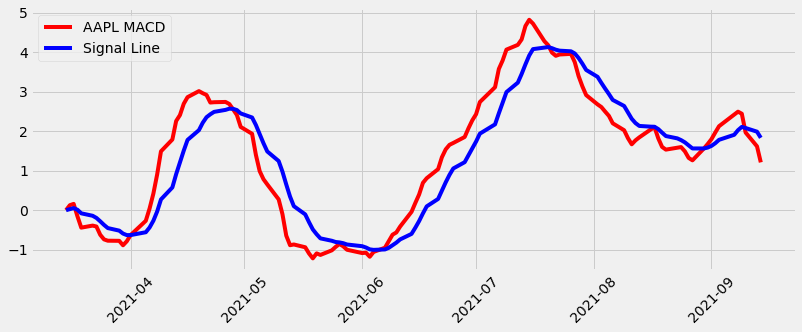

In [18]:
plt.figure (figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label = 'AAPL MACD', color= 'red')
plt.plot (df.index, signal, label='Signal Line', color= 'blue')
plt.xticks (rotation =45)
plt.legend (loc='upper left')
plt.show()

In [19]:
#Create new columns for the data
df[ 'MACD'] = MACD
df[ 'Signal Line'] = signal
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
2021-03-15,2021-03-15,121.410004,124.000000,120.419998,123.989998,123.594574,92403800,0.000000,0.000000
2021-03-16,2021-03-16,125.699997,127.220001,124.720001,125.570000,125.169533,115227900,0.126040,0.025208
2021-03-17,2021-03-17,124.050003,125.860001,122.339996,124.760002,124.362122,111932600,0.158738,0.051914
2021-03-18,2021-03-18,122.879997,123.180000,120.320000,120.529999,120.145607,121229700,-0.154889,0.010553
2021-03-19,2021-03-19,119.900002,121.430000,119.680000,119.989998,119.607330,185549500,-0.441921,-0.079942
...,...,...,...,...,...,...,...,...,...
2021-09-08,2021-09-08,156.979996,157.039993,153.979996,155.110001,155.110001,74420200,2.491507,2.023544
2021-09-09,2021-09-09,155.490005,156.110001,153.949997,154.070007,154.070007,57305700,2.439279,2.106691
2021-09-10,2021-09-10,155.000000,155.479996,148.699997,148.970001,148.970001,140646400,1.963723,2.078097
2021-09-13,2021-09-13,150.630005,151.419998,148.750000,149.550003,149.550003,102404300,1.615026,1.985483


In [34]:
#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = - 1


  for i in range(0, len(signal)):
    if signal['MACD'][i]> signal[ 'Signal Line'][i]: 
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal [ 'Close' ][i])
        flag = 1

      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0 :
        Sell.append(signal['Close'][i])
        flag = 0   
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)

  return (Buy, Sell)

In [35]:
#Create buy and sell column
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

In [36]:
#Show data 
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2021-03-15,2021-03-15,121.410004,124.000000,120.419998,123.989998,123.594574,92403800,0.000000,0.000000,NaN,NaN
2021-03-16,2021-03-16,125.699997,127.220001,124.720001,125.570000,125.169533,115227900,0.126040,0.025208,125.57,NaN
2021-03-17,2021-03-17,124.050003,125.860001,122.339996,124.760002,124.362122,111932600,0.158738,0.051914,NaN,NaN
2021-03-18,2021-03-18,122.879997,123.180000,120.320000,120.529999,120.145607,121229700,-0.154889,0.010553,NaN,120.529999
2021-03-19,2021-03-19,119.900002,121.430000,119.680000,119.989998,119.607330,185549500,-0.441921,-0.079942,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08,2021-09-08,156.979996,157.039993,153.979996,155.110001,155.110001,74420200,2.491507,2.023544,NaN,NaN
2021-09-09,2021-09-09,155.490005,156.110001,153.949997,154.070007,154.070007,57305700,2.439279,2.106691,NaN,NaN
2021-09-10,2021-09-10,155.000000,155.479996,148.699997,148.970001,148.970001,140646400,1.963723,2.078097,NaN,148.970001
2021-09-13,2021-09-13,150.630005,151.419998,148.750000,149.550003,149.550003,102404300,1.615026,1.985483,NaN,NaN


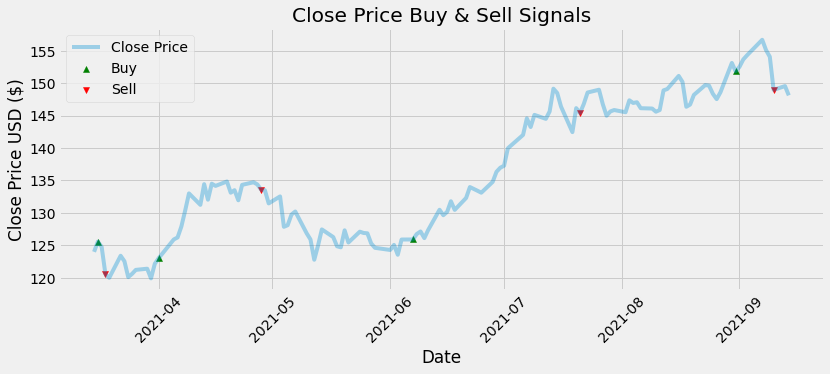

In [40]:
#Visually show the stock buy and sell signals
plt.figure(figsize=(12.2, 4.5)) 
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha =1)
plt.scatter (df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(df['Close'], label='Close Price', alpha = 0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)') 
plt.legend (loc = 'upper left')
plt.show()